In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import nltk
from nltk.util import pr
from nltk.corpus import stopwords
import string 

from wordcloud import WordCloud

In [ ]:
# pd.set_option('display.max_colwidth', None)
#pd.reset_option('display.max_colwidth')

In [2]:
#download stopwords
#nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english") #to reduce word to its stem > Lemmatization???
stopword = set(stopwords.words("english")) #to elimiate unimportand words, allowing applications to focus on the important word

# Data class
- Hate
- Non-Hate

# Dataset

## DV

- enhancmenet = select only those row which has all agreement

In [ ]:
df = pd.read_csv("Dataset/DV/labeled_data.csv")
df.info()

In [ ]:
df.head()

In [ ]:
df['label'].value_counts()

Extract tweet and the label column

label column
- hate speech 0 = Hate
- offensive language 1 = Non-Hate
- neither 2 = Non-Hate

In [ ]:
df['class'] = df['label'].map({0:"Hate", 1:"Non-Hate", 2:"Non-Hate"})
cleaned_df = df[['class','tweet']].rename(columns={'tweet':'text'})
cleaned_df.to_csv("Dataset/DV/cleaned_data.csv", index=False)

Plot

In [ ]:
p = sb.countplot(x='class', data=cleaned_df, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## GabHateCorpus

## SE2019-task-5


In [5]:
filepath = "Dataset/SE2019/"

In [6]:
df = pd.read_csv(filepath+"hateval2019_en_train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      9000 non-null   int64 
 1   text    9000 non-null   object
 2   HS      9000 non-null   int64 
 3   TR      9000 non-null   int64 
 4   AG      9000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 351.7+ KB


In [7]:
df.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [8]:
df['HS'].value_counts()

HS
0    5217
1    3783
Name: count, dtype: int64

Extract text and HS column and save to csv file

HS column
- 0 = Non-Hate
- 1 = Hate

In [9]:
df['class'] = df['HS'].map({0:"Non-Hate", 1:"Hate"})
df['hate'] = df['class'].apply(lambda x: 1 if x =='Hate' else 0)

df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

,class,text,hate
0,Hate,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Hate,Why would young fighting age men be the vast m...,1
2,Hate,@KamalaHarris Illegals Dump their Kids at the ...,1
3,Non-Hate,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Non-Hate,Orban in Brussels: European leaders are ignori...,0


In [73]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

Plot

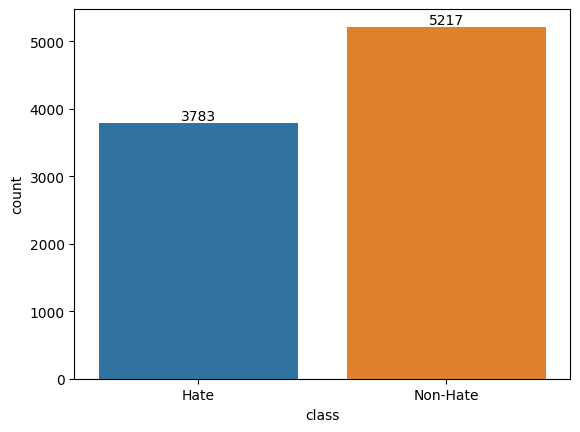

In [10]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

## Twitter-SA

## implicit-hate-corpus


# Text preprocessing

In [3]:
import emoji

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are already masked as @user due to privacy concerns. So, these Twitter handles are hardly giving any information about the nature of the tweet.
We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
Once we have executed the above three steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
In the 4th tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information
- Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”

- todo: talk about before and after cleaning words count 

In [14]:
def clean(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text) # remove emoji
    text = re.sub('@[\w]*', '', text) #remove tweeter handler
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) #replace URL
    text = re.sub('<.*?>+', '', text)
    text = re.sub("[^a-zA-Z# ]", "", text) #remove punctuation, number, special character,keep hash
    text = re.sub('\n', '', text) #remove line break
    text = re.sub('\w*\d\w*', '', text) # not sure
    text = re.sub(r'\s+', ' ', text) #remove multiple spaces
    text = [word for word in text.split(' ') if word not in stopword]
    #text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

def stem(text):
    text = [stemmer.stem(word) for word in text]
    text = " ".join(text)
    return text

In [93]:
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
df = pd.read_csv(filepath+"data_needed.csv")
df.head()

,class,text,hate
0,Hate,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Hate,Why would young fighting age men be the vast m...,1
2,Hate,@KamalaHarris Illegals Dump their Kids at the ...,1
3,Non-Hate,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Non-Hate,Orban in Brussels: European leaders are ignori...,0


In [15]:
# clean
df['text'] = df['text'].apply(clean)
df.head(6)

,class,text,hate
0,Hate,hurray saving us many ways #lockthemup #buildt...,1
1,Hate,would young fighting age men vast majority one...,1
2,Hate,illegals dump kids border like road kill refu...,1
3,Non-Hate,ny times nearly white states pose array proble...,0
4,Non-Hate,orban brussels european leaders ignoring peopl...,0
5,Hate,legal illegal #buildthatwall,1


In [19]:
df[df['text'] == " "], df[df['text'] == ""]

(         class text  hate
 681   Non-Hate          0
 1665  Non-Hate          0
 2053      Hate          1
 2673  Non-Hate          0
 3513  Non-Hate          0
 3860      Hate          1
 4235  Non-Hate          0
 6939  Non-Hate          0
 7443  Non-Hate          0
 7490  Non-Hate          0
 7497  Non-Hate          0
 8568  Non-Hate          0,
          class text  hate
 1018  Non-Hate          0
 1063  Non-Hate          0
 1321  Non-Hate          0
 1649  Non-Hate          0
 3424  Non-Hate          0
 3547  Non-Hate          0
 7122  Non-Hate          0
 7175  Non-Hate          0
 7331  Non-Hate          0
 7341  Non-Hate          0
 7351  Non-Hate          0
 7574  Non-Hate          0)

In [100]:
print(df['class'].value_counts())
df = df[df['text'] != ""]
df = df[df['text'] != " "]
print(df['class'].value_counts())

class
Non-Hate    5217
Hate        3783
Name: count, dtype: int64
class
Non-Hate    5195
Hate        3781
Name: count, dtype: int64


In [103]:
# save to csv
filename = "data_processed.csv"
df.to_csv(filepath+filename, index=False)

In [104]:
# clean and stem
df['text'] = df['text'].apply(stem)
df.head(5)

,class,text,hate
0,Hate,hurray save us mani way #lockthemup #buildthew...,1
1,Hate,would young fight age men vast major one escap...,1
2,Hate,illeg dump kid border like road kill refus un...,1
3,Non-Hate,ny time near white state pose array problem im...,0
4,Non-Hate,orban brussel european leader ignor peopl want...,0


In [107]:
# save to csv
filename = "data_stemmed.csv"
df.to_csv(filepath+filename, index=False)

# visualization

In [ ]:
df = pd.read_csv("Dataset/SE2019/cleaned_data1.csv")
# df = pd.read_csv("Dataset/SE2019/preocessed_data.csv")

In [ ]:
df.head()

Common word

In [ ]:
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common word in non hate

In [ ]:
words =' '.join([text for text in df['text'][df['hate'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Common word in hate

In [ ]:
words =' '.join([text for text in df['text'][df['hate'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## understanding hashtag

In [ ]:
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# use havent processed data so word not edited 
ht_nonhate = hashtag_extract(df['text'][df["hate"]==0])
ht_hate = hashtag_extract(df['text'][df['hate']==1])

In [ ]:
# 2d to 1d array
ht_nonhate = sum(ht_nonhate, [])
ht_hate = sum(ht_hate, [])


barchart for common word for hashtag
- As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

In [ ]:
a = nltk.FreqDist(ht_nonhate)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


In [ ]:
a = nltk.FreqDist(ht_hate)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sb.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


# Handle imbalance data